In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lecture du fichier

In [6]:
data = pd.read_csv('heart.csv', delimiter=';')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


In [7]:
df = data.copy()

#### Dimension du dataset

In [8]:
df.shape

(919, 12)

### Types et valeurs manquantes par variable

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             919 non-null    int64  
 1   Sex             919 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 86.3+ KB


In [10]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        1
MaxHR             1
ExerciseAngina    1
Oldpeak           1
ST_Slope          1
HeartDisease      1
dtype: int64

Observations : 
 - Une ligne semble avoir des valeur nulle
 - HeartDisease et FastingBS ne sont pas au bon format

### Identification et suppression de la ligne "null"

In [11]:
df[df['ChestPainType'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
793,54,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.drop(793)

In [13]:
df.shape

(918, 12)

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Changement du type de HeartDisease et FastingBS en object

In [15]:
df['FastingBS'] = df['FastingBS'].astype(int).astype(object)
df['HeartDisease'] = df['HeartDisease'].astype(int).astype(object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 93.2+ KB


In [17]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


### Distribution variable cible

In [18]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Observation : la classe est équilibré

### Analyse univarié variable quanti

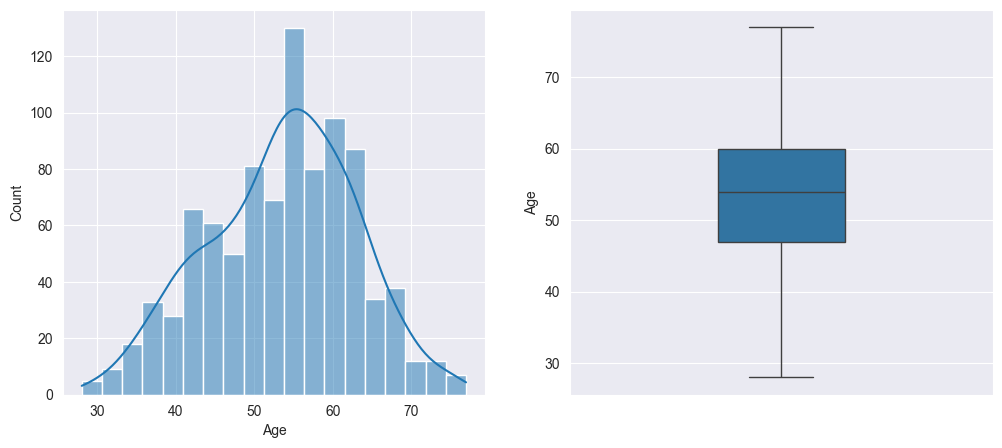

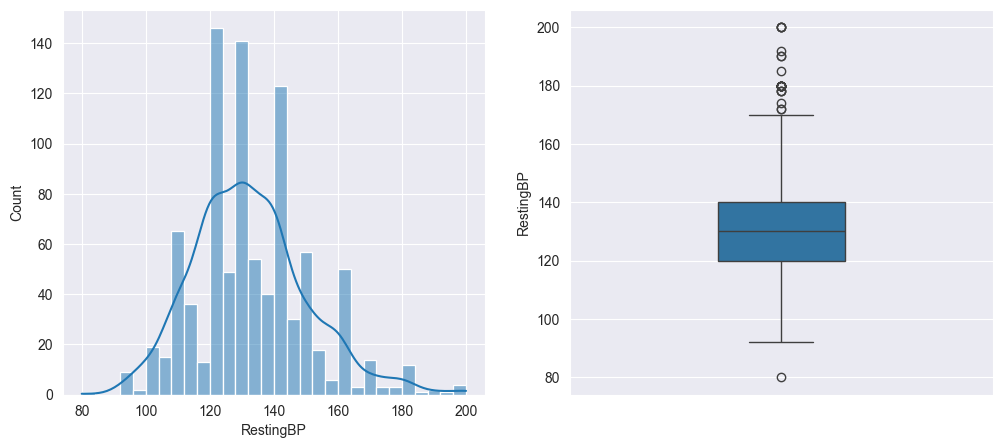

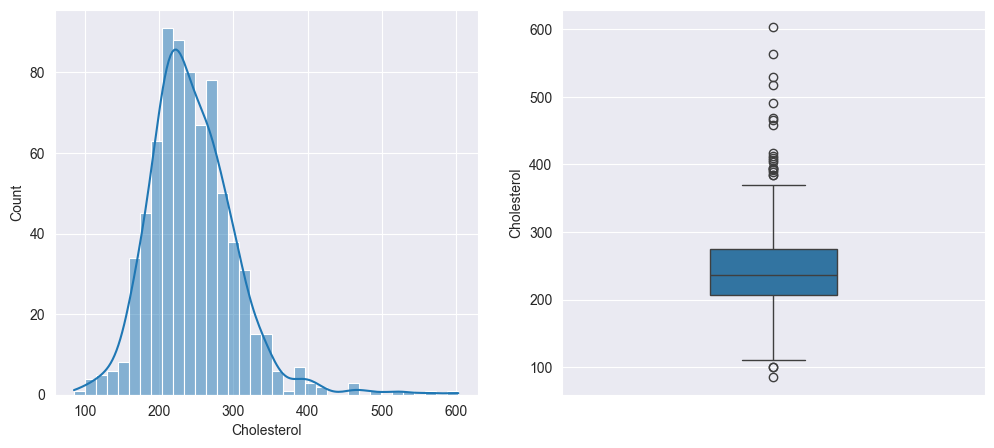

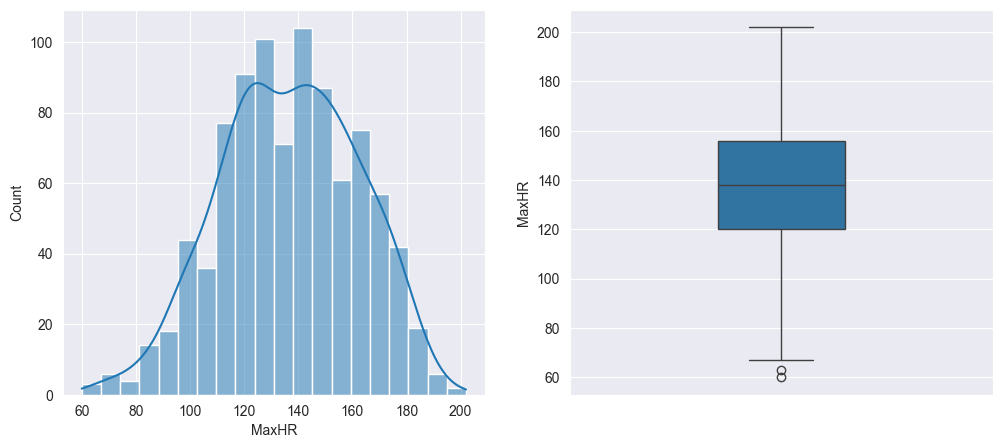

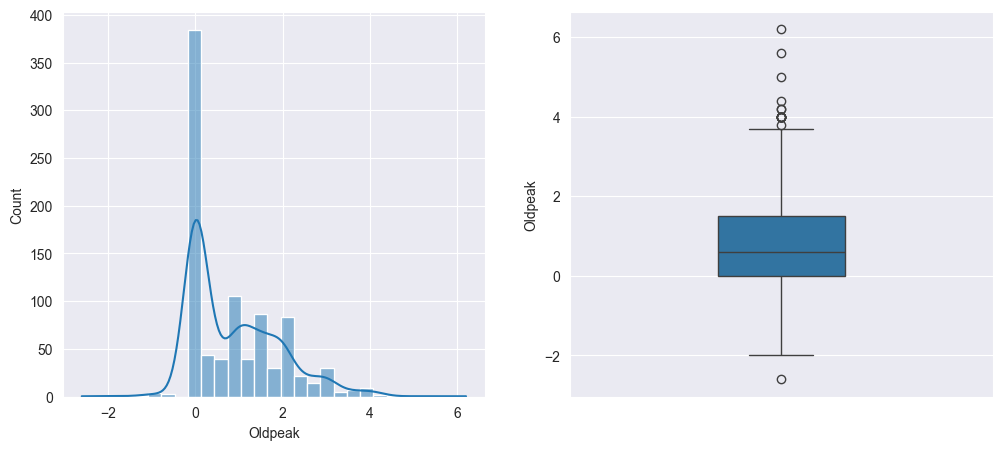

In [30]:
import seaborn as sns

for col in df.select_dtypes(['float64','int64']):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, edgecolor=None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width= 0.3)

Osbervations :
 - Toutes les distributions suivent des lois normales
 - Une valeur à 0 pour RestingBP : outlier ? Valeur nulle ?
 - ~ 20% de valeur à 0 pour Choolesterol => impossible ce sont des valeurs nulles

### Remplacer les 0 par des valeurs nulles pour la variable Cholesterol

In [31]:
df['Cholesterol'].loc[df['Cholesterol'] == 0] = None

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_11264/2212974269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cholesterol'].loc[df['Cholesterol'] == 0] = None


In [32]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Identifier la ligne où RestingBP est null

In [33]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Pas de valeur aberantes, on décide de remplacer la valeur par 0 plutot que de supprimer la ligne

In [34]:
df['RestingBP'].loc[df['RestingBP'] == 0] = None

/var/folders/1c/70ngsvd53b5fbc_qfg773ckc0000gn/T/ipykernel_11264/4267426226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RestingBP'].loc[df['RestingBP'] == 0] = None


In [35]:
df.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Analyse univarié quali

In [36]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Sex----------------- ['M' 'F']
ChestPainType------- ['ATA' 'NAP' 'ASY' 'TA']
FastingBS----------- [0 1]
RestingECG---------- ['Normal' 'ST' 'LVH']
ExerciseAngina------ ['N' 'Y']
ST_Slope------------ ['Up' 'Flat' 'Down']
HeartDisease-------- [0 1]


Observations : 
 - La variable Sex est mal configurée

### Reconfiguration de la variable sex

In [37]:
df['Sex'] = df['Sex'].replace(['Male', 'Female'], ['M', 'F'])

In [38]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

### Affichage graphique variable qualitative

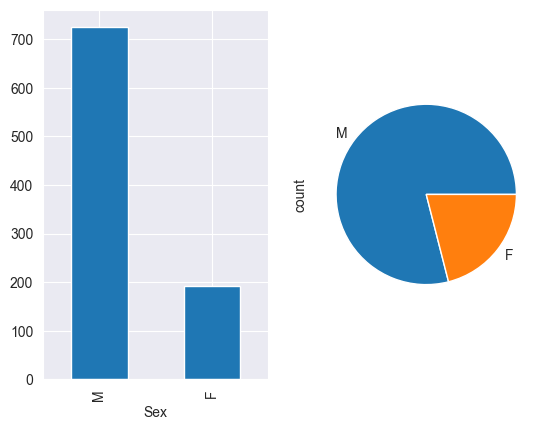

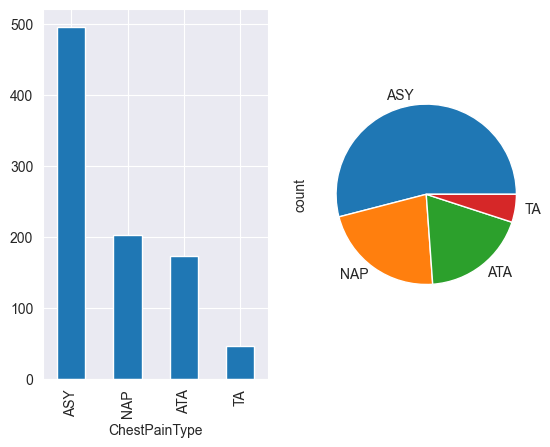

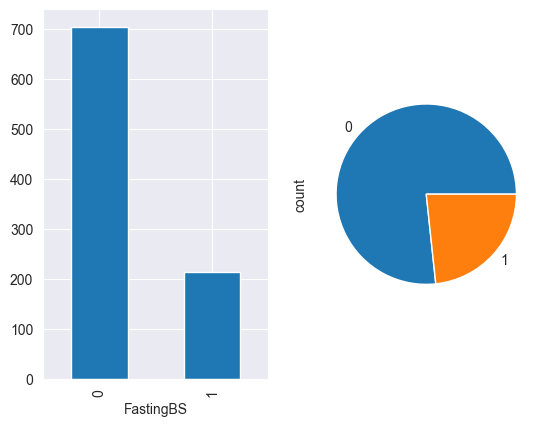

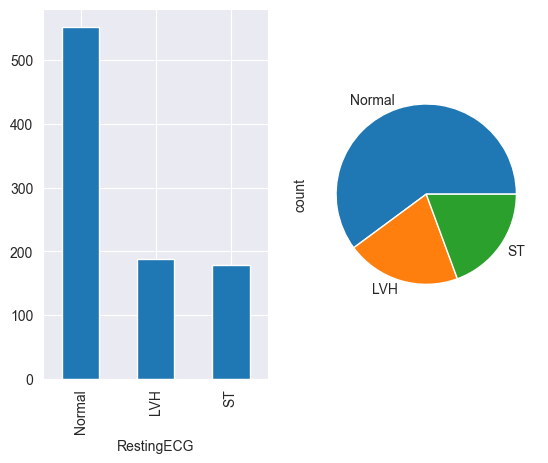

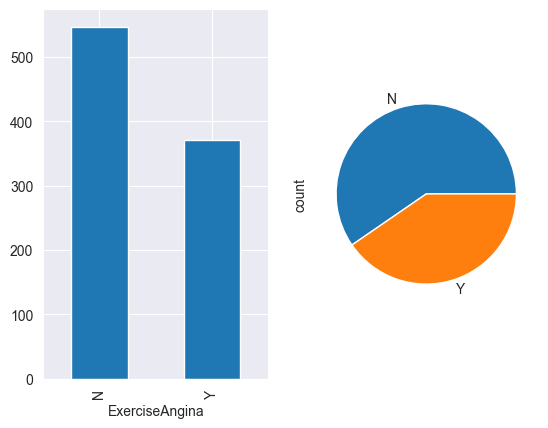

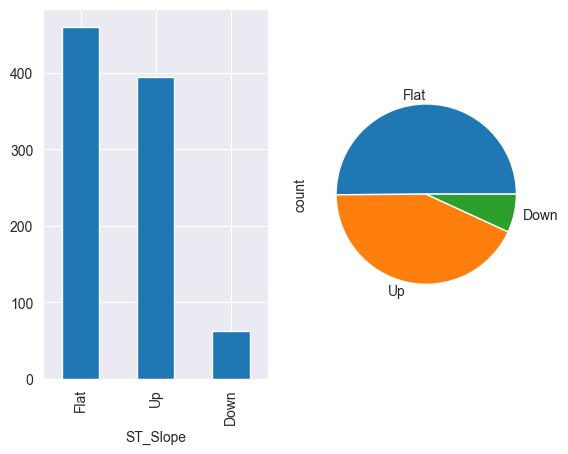

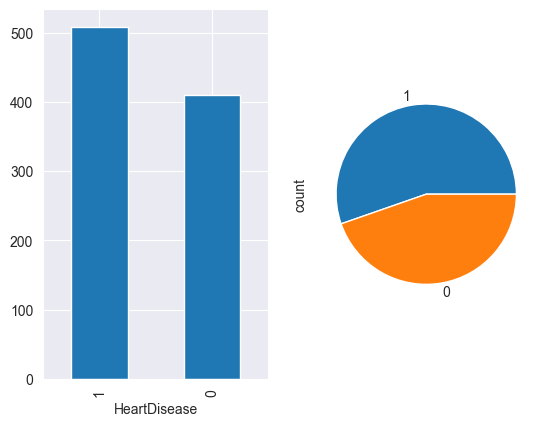

In [42]:
for col in df.select_dtypes('object'):
    plt.figure()
    
    plt.subplot(1,2,1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie()

Observations : 
 - 'TA' de ChesPainType : peu de valeurs
- 'Down' de ST_Slope : peu de valeurs

### Analyse bivariée

In [48]:
positive_df = df[df['HeartDisease'] == 1]
negative_df = df[df['HeartDisease'] == 0]

In [49]:
positive_df['HeartDisease'].value_counts()

HeartDisease
1    508
Name: count, dtype: int64

In [50]:
negative_df['HeartDisease'].value_counts()

HeartDisease
0    410
Name: count, dtype: int64

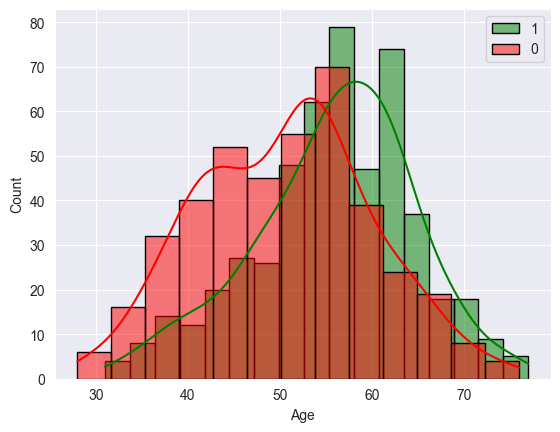

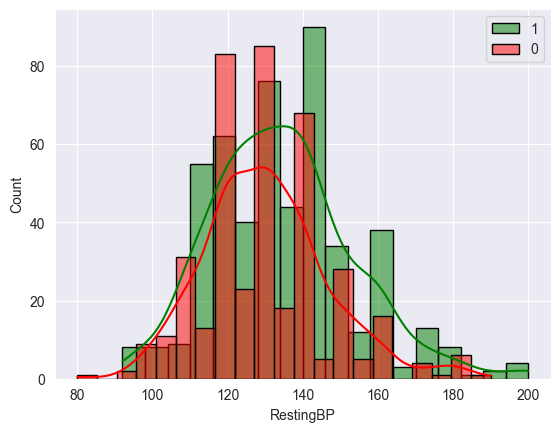

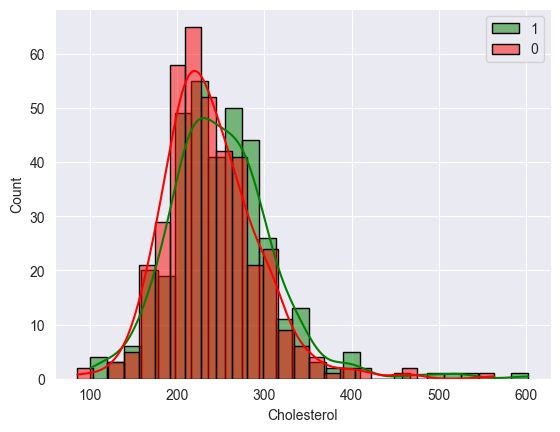

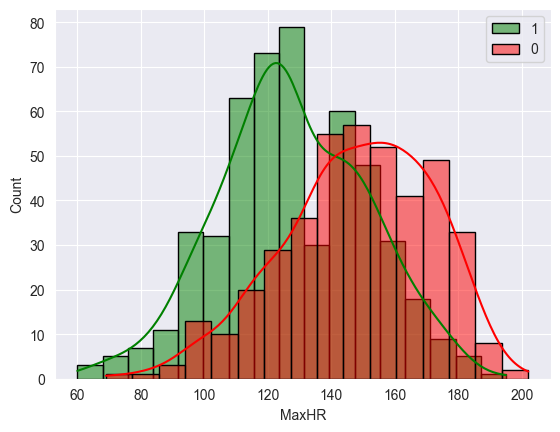

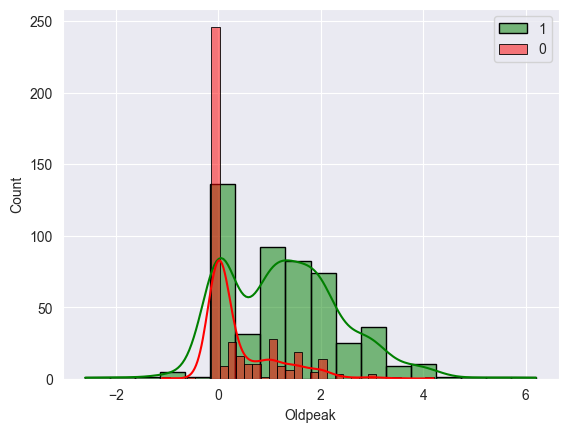

In [61]:
for col in df.select_dtypes(['float64', 'int64']):
    sns.histplot(positive_df[col], label='1' , kde=True, edgecolor='Black', color='green')
    sns.histplot(negative_df[col], label='0' , kde=True, edgecolor='Black', color='red')
    
    plt.legend()
    plt.show()

Observations : 
- Les distributions de Age, MaxHr, OldPeak semblent significativement différentes

### Analyse bivariée variables qualitatives

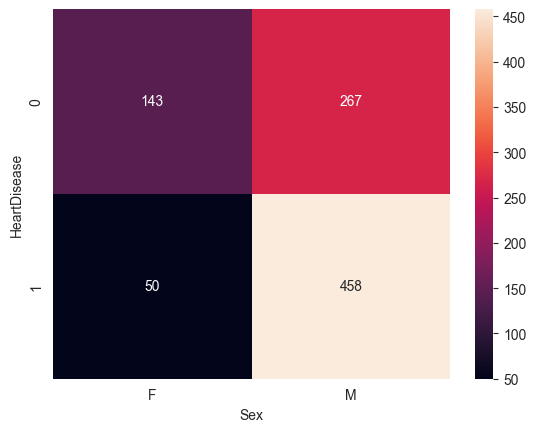

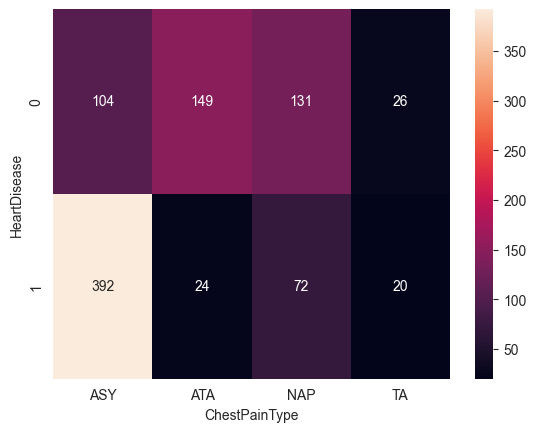

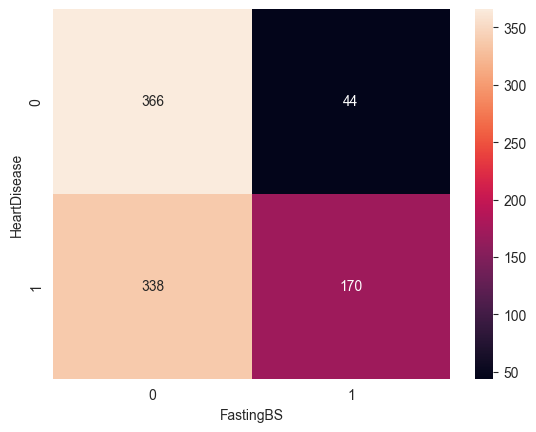

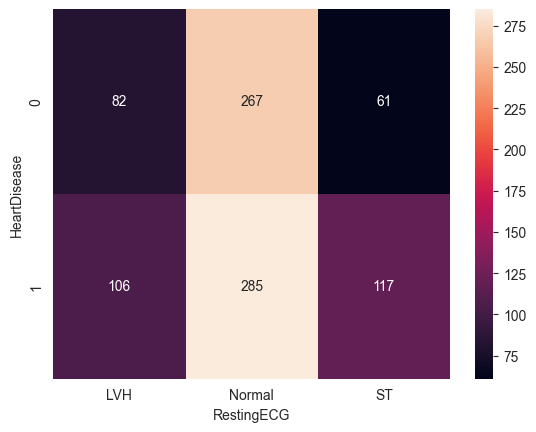

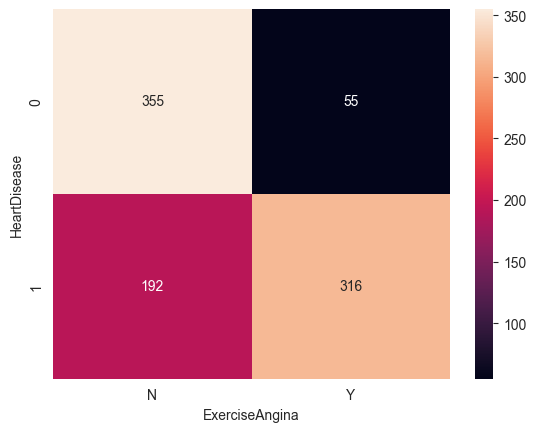

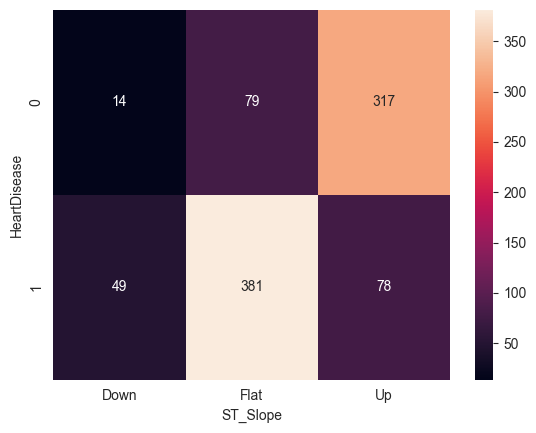

In [64]:
for col in df.drop('HeartDisease', axis=1).select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

## Preprocessing

### Train - test split

In [66]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4d/3a/434ae6d126fec4603375a92680aca8adb37839c3b17e6833c28ba2d58437/scikit_learn-1.4.0-1-cp312-cp312-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/71/ba/744bbdd65eb3fce1412dd4633fc425ad39e6b4068b5b158aee1cd3afeb54/scipy-1.12.0-cp312-cp312-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 4.0 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [70]:
trainset['HeartDisease'].value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [72]:
testset['HeartDisease'].value_counts()

HeartDisease
1    107
0     77
Name: count, dtype: int64

### Encodage

In [76]:
df_encodage = pd.get_dummies(df, columns=list(df.drop('HeartDisease', axis=1).select_dtypes('object').columns), dtype=int)

In [78]:
(df_encodage.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,172.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,156.0,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,98.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,108.0,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,122.0,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [83]:
def preprocessing(df):
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease', axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    df = df.dropna()
    
    x = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    return x, y

In [84]:
x_train, y_train = preprocessing(trainset)
x_test, y_test = preprocessing(testset)

In [85]:
x_train.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
738,65,160.0,360.0,151.0,0.8,1,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
85,66,140.0,139.0,94.0,1.0,0,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
75,46,150.0,163.0,116.0,0.0,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
681,51,140.0,261.0,186.0,0.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,1
698,41,130.0,214.0,168.0,2.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0
